# Linear Regression

In [295]:
import kagglehub
import os

path = kagglehub.dataset_download("shubham47/salary-data-dataset-for-linear-regression")

files = os.listdir(path)
files

['Salary_Data.csv']

In [296]:
import pandas as pd

df = pd.read_csv(f"{path}/{files[0]}")
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


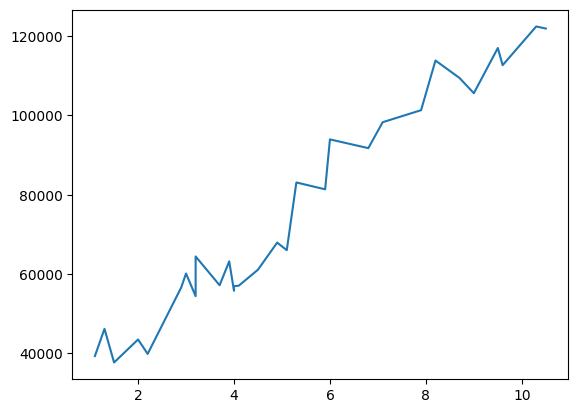

In [297]:
import matplotlib.pyplot as plt

plt.plot(df["YearsExperience"], df["Salary"])
plt.show()

In [298]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate, epochs):
        self.w = None
        self.b = None
        self.history = []
        self.learning_rate = learning_rate
        self.epochs = epochs

    def __initialize_parameters(self, x):
        self.w = np.random.random(size=x.shape[1]) * 0.01
        self.b = 0

    def __inference__(self, x):
        self.n = len(x)
        return np.dot(x, self.w) + self.b 
    
    def __cost_function__(self, y_pred, y_truth):
        return (1 / (2 * self.n)) * np.sum(np.square(y_pred - y_truth))
        
    def __backpropagation__(self, x, y_pred, y_truth):
        j = self.__cost_function__(y_pred, y_truth)
        self.history.append(j)
        dw = (1 / self.n) * np.dot((y_pred - y_truth), x)
        db = (1 / self.n) * np.sum(y_pred - y_truth)

        return dw, db

    def __update_gradiant__(self, dw, db):
        self.w -= dw * self.learning_rate
        self.b -= db * self.learning_rate

    def fit(self, x, y):
        self.__initialize_parameters(x)
        for epoch in range(self.epochs):
            y_pred = self.__inference__(x)
            dw, db = self.__backpropagation__(x, y_pred, y)
            self.__update_gradiant__(dw, db)
    
    def predict(self, x: np.array):
        return self.__inference__(x)

In [299]:
from sklearn.model_selection import train_test_split

epochs = 100
learning_rate = 0.05

def standardize_data(x_train, x_valid):
    mean = np.mean(x_train)
    std = np.std(x_train)

    x_train = (x_train - mean) / std
    x_valid = (x_valid - mean) / std
    return x_train, x_valid

x, y = df["YearsExperience"], df["Salary"]

x_train, x_valid, y_train, y_valid = train_test_split(
    x,
    y,
    random_state=42,
    test_size=0.2
)

# standardize data to have a standard deviation of 1 and a mean of 0.
x_train, x_valid = standardize_data(x_train, x_valid)

# you can ignore these lines.
x_train = np.expand_dims(x_train.values, axis=1)
x_valid = np.expand_dims(x_valid.values, axis=1)

In [300]:
linear_regression = LinearRegression(
    learning_rate=learning_rate,
    epochs=epochs
)

linear_regression.fit(x_train, y_train)

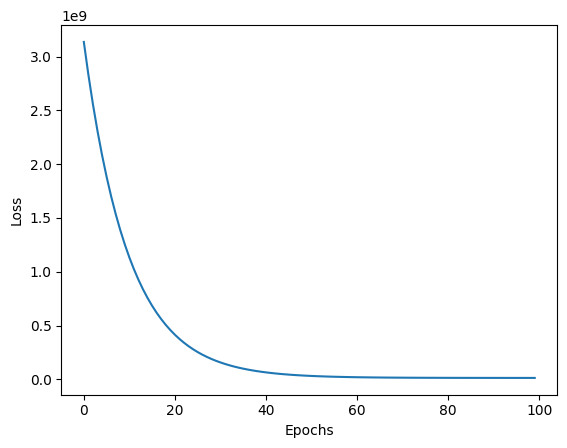

In [301]:
loss_history = linear_regression.history
time = [i for i in range(epochs)]
plt.plot(time, loss_history)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [302]:
y_pred = linear_regression.predict(x_valid)
y_pred

array([115104.67081336,  71074.97044847, 101989.44091744,  74822.17899017,
        55149.33414628,  59833.3448234 ])

### Computing some metrics

In [303]:
y_pred = np.array(y_pred)
y_valid = np.array(y_valid)

y_pred, y_valid

(array([115104.67081336,  71074.97044847, 101989.44091744,  74822.17899017,
         55149.33414628,  59833.3448234 ]),
 array([112635,  67938, 113812,  83088,  64445,  57189]))

In [304]:
def compute_mse(y_true, y_pred):
    return np.sum(np.square(y_true - y_pred))

mse = compute_mse(y_valid, y_pred)
mse

317438520.9572738